In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as matim
import ipywidgets as widgets

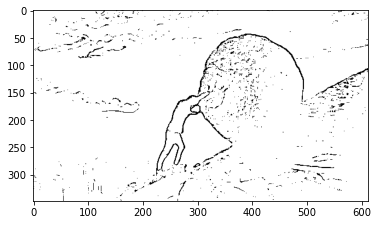

In [2]:
img = matim.imread("image.jpg")
#Edge mask
def edge_mask(img, ksize, block_size):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_median = cv2.medianBlur(gray, ksize)
    edges = cv2.adaptiveThreshold(gray_median, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, block_size, ksize)
    return edges

edge_img = edge_mask(img, 5,5)

plt.imshow(edge_img, cmap='gray')

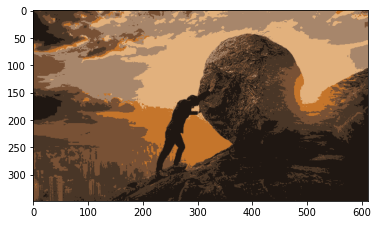

In [6]:
def kmeans_cluster(img, k):
    #Transform image
    data = np.float32(img).reshape((-1,3))
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    #k means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

cluster_img = kmeans_cluster(img, 6)
plt.imshow(cluster_img)

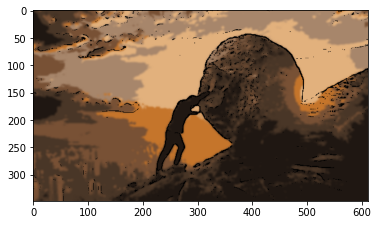

In [9]:
# apply bilateral filter
d = 7
sigmacolor = 200
sigmaspace = 200
bilateral = cv2.bilateralFilter(cluster_img, d=d, sigmaColor=sigmacolor, sigmaSpace=sigmaspace)
cartoon = cv2.bitwise_and(bilateral, bilateral, mask=edge_img)
plt.imshow(cartoon)